# Data science II

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1a/NumPy_logo.svg" width=400, align=left>


# [Numpy](https://www.numpy.org/)...

- lets us create N-dimensional arrays
- lets us efficiantly work with those arrays
- integrates with or is the basis for many other usefull packages like scipy, pandas, xarray, etc.

## What are arrays?

- like lists
- can have more dimensions that 1 (kind of like a list of lists when thinking about 2 dimensions)
- are easier to work with than list of lists

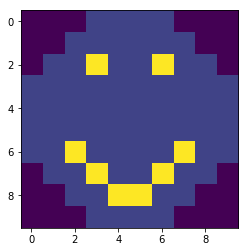

In [18]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([3., 6., 8., 7., 9., 4., 1., 6., 4., 4., 8.])

smile = np.array([[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 5, 1, 1, 5, 1, 1, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 5, 1, 1, 1, 1, 5, 1, 1],
                  [0, 1, 1, 5, 1, 1, 5, 1, 1, 0],
                  [0, 0, 1, 1, 5, 5, 1, 1, 0, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]])



plt.imshow(smile)
plt.show()

### Attributes

In [17]:
print(a.ndim)
print(smile.ndim)

print(a.shape)
print(smile.shape)

print(a.dtype)
print(smile.dtype)

# size, itemsize, nbytes

2
2
(1, 11)
(10, 10)
float64
int64


### Other ways to create arrays

In [23]:
np.ones((5,5))

np.zeros((5,5))

#step value
np.arange(1,10,1)
#number of items
np.linspace(1,10,5)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

### Accessing elements (indexing)

array([[3.],
       [6.],
       [8.],
       [7.],
       [9.],
       [4.],
       [1.],
       [6.],
       [4.],
       [4.],
       [8.]])

### Slicing

In [ ]:
# parts of arrays
a[:5]
# every other element
a[:2]
#negative step index => reversing
a[::-1]

### Copys

- slicing returns views => changing values in view changes them in the original array too!!!!!!!!!!!!!!!!!!
- to make copy use .copy()

### Reshaping

In [34]:
b = np.arange(1,10).reshape(3,3)
b

#row to column vector
a.reshape(11,1)
#np.newaxis
a[:, np.newaxis]

array([[3.],
       [6.],
       [8.],
       [7.],
       [9.],
       [4.],
       [1.],
       [6.],
       [4.],
       [4.],
       [8.]])

#### Flatten vs Ravel

### Fancy indexing

### Aggregating

np.sum 	np.nansum 	Compute sum of elements
np.prod 	np.nanprod 	Compute product of elements
np.mean 	np.nanmean 	Compute mean of elements
np.std 	np.nanstd 	Compute standard deviation
np.var 	np.nanvar 	Compute variance
np.min 	np.nanmin 	Find minimum value
np.max 	np.nanmax 	Find maximum value
np.argmin 	np.nanargmin 	Find index of minimum value
np.argmax 	np.nanargmax 	Find index of maximum value
np.median 	np.nanmedian 	Compute median of elements

### Ufuncs

### Broadcasting

In [37]:
import xarray as xr

t = xr.open_dataset("/home/ro/Downloads/tg_ens_mean_0.25deg_reg_v19.0e.nc", chunks={'time': 10})
print(t)

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 464, time: 25202)
Coordinates:
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2018-12-31
Data variables:
    tg         (time, latitude, longitude) float32 dask.array<shape=(25202, 201, 464), chunksize=(10, 201, 464)>
Attributes:
    E-OBS_version:  19.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Mon Feb 18 12:46:55 2019: ncks -O -d time,0,25201 /data4/...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....


In [ ]:
climatology = t.groupby('time.month').mean('time')
anomalies = t.groupby('time.month') - climatology

print(anomalies.compute())

## numpy

- np.ones, np.zeros, np.random.random
- np.arange, np.linspace
    - step value for np.linspace() or a number of samples for np.arange()
- subsetting, slicing, boolean & fancy indexing
    - Reverse only the row positions arr2[::-1, ]
    - https://jakevdp.github.io/PythonDataScienceHandbook/02.07-fancy-indexing.html
- shape, reshape, flatten vs ravel, dtype, axis, astype
- multiplication, addition etc. (np.add/+, ..), sqrt, exp, sin, etc.
    - https://jakevdp.github.io/PythonDataScienceHandbook/02.03-computation-on-arrays-ufuncs.html
- broadcasting
- element wise comparison array == 0, array < 2, np.where
- aggregation: array.min(), max, median, mean, std, cumsum (axis argument!)
- views, copys, https://www.jessicayung.com/numpy-views-vs-copies-avoiding-costly-mistakes/
- np.nan, np.infinite, x[~np.isnan(x)]
- combining arrays: np.concatenate, np.vstack/hstack
- transpose, masking?, np.tile, np.repeat



In [4]:
import numpy as np

t = np.random.random((5,5))
print(t)
t.std()
t.dtype

[[0.58345215 0.53089446 0.38079762 0.60208682 0.26686928]
 [0.00530617 0.39924401 0.0241768  0.05749943 0.66041137]
 [0.17441401 0.33376307 0.85166452 0.04157447 0.08470879]
 [0.8059379  0.84541601 0.88974733 0.47634127 0.73554535]
 [0.70059674 0.74282644 0.85811977 0.57046618 0.98663207]]


0.3045825182804876

shape:
https://www.oreilly.com/library/view/elegant-scipy/9781491922927/assets/elsp_0105.png

broadcasting:
https://scipy-lectures.org/_images/numpy_broadcasting.png

In [33]:
t = np.linspace(1,10,8)
print(t)
t = np.arange(1,11,1)
print(t)

t[t<5] = 17
print(t)

t = np.arange(1,11,1)
np.where(t<5, 17, t)

[ 1.          2.28571429  3.57142857  4.85714286  6.14285714  7.42857143
  8.71428571 10.        ]
[ 1  2  3  4  5  6  7  8  9 10]
[17 17 17 17  5  6  7  8  9 10]


array([17, 17, 17, 17,  5,  6,  7,  8,  9, 10])

## xarray
 - create DataArray, Dataset
 - .values, .coords, .dims, .attrs
 - indexing
 - computation: sin, cos, exp etc.
 - aggregation: .mean, etc. (can use dimension names instead of axis numbers!)
 - ds.drop() -> droping variables, ds.drop_dims("dim_name"), .rename ->rename variables
 - groupby? (sebastian introduce for pandas in unit 4?)
 - .to_series(), to_dataframe()
 - .to_netcdf()
 
 - dask?
 - load multiple datasets

In [15]:
from pathlib import Path
import xarray as xr

data_dir = Path("/home/ro/dev/python_course/mod06_l2/Daten_MSc_Kurs")

modis_file = "MYD08_D3.A2007001.006.2015087142520.hdf"
modis_file = "MOD06_L2.A2006019.1200.006.2014353175014.hdf"

data_file = data_dir / modis_file

#ds = xr.open_dataset(data_file, engine = "h5netcdf")
#print(ds)

## h5py ???

In [46]:
import h5py

f = h5py.File(str(data_file), "r")

print(f.keys)

OSError: Unable to open file (file signature not found)

In [48]:
from pyhdf.SD import SD, SDC
import numpy as np
import dask.array as da

print(data_file)

f = SD(str(data_file), SDC.READ)

print(f.info())
#print(f.datasets())
sd = f.select("Cloud_Water_Path")
#.info())
sd.__dict__["shape"] = sd.info()[2]
sd.__dict__["dtype"] = np.uint16
print(sd.__dict__)
da.from_array(sd, chunks=(500,500)).compute()
#sd.get()

/home/ro/dev/python_course/mod06_l2/Daten_MSc_Kurs/MOD06_L2.A2006019.1200.006.2014353175014.hdf
(127, 14)
{'_sd': <pyhdf.SD.SD object at 0x7fbae106e898>, '_id': 3407956, 'shape': [2030, 1354], 'dtype': <class 'numpy.uint16'>}


array([[-9999, -9999,   257, ..., -9999, -9999, -9999],
       [-9999, -9999,   312, ..., -9999, -9999, -9999],
       [-9999, -9999,   328, ..., -9999, -9999, -9999],
       ...,
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

## Dask

In [17]:
import xarray as xr

rs = np.random.RandomState(0)

array1 = xr.DataArray(rs.randn(1000, 100000), dims=['place', 'time'])

%time _ = array1.sum("time")

chunked1 = array1.chunk({'place': 10})
print(chunked1)

%time _ = chunked1.sum("time").compute()

CPU times: user 262 ms, sys: 248 ms, total: 511 ms
Wall time: 510 ms
<xarray.DataArray (place: 1000, time: 100000)>
dask.array<shape=(1000, 100000), dtype=float64, chunksize=(10, 100000)>
Dimensions without coordinates: place, time
CPU times: user 736 ms, sys: 0 ns, total: 736 ms
Wall time: 252 ms


## Exercise 5

- Complete the fifth assignment and push your results until tuesday 14:00 next week

In [2]:
"/home/ro/dev/python_course/mod06_l2/Daten_MSc_Kurs"

'/home/ro/dev/python_course/mod06_l2/Daten_MSc_Kurs'

In [3]:
import sys, inspect
def print_classes():
    for name, obj in inspect.getmembers(sys.modules[__name__]):
        if inspect.isclass(obj):
            print(obj)

In [4]:
import satpy

satpy.__path__

for name, obj in inspect.getmembers(satpy.composites):
    if inspect.isclass(obj):
        print(obj.__name__)
        print(obj.__doc__)

Airmass
None
BWCompositor
None
CO2Corrector
None
Calculator
A thermal near-infrared (~3.7 micron) band reflectance calculator.

    Given the relative spectral response of the NIR band, the solar zenith
    angle, and the brightness temperatures of the NIR and the Thermal bands,
    derive the solar reflectance for the NIR band removing the thermal
    (terrestrial) part. The in-band solar flux over the NIR band is
    optional. If not provided, it will be calculated here!

    The relfectance calculated is without units and should be between 0 and 1.
    
CloudCompositor
None
ColorizeCompositor
A compositor colorizing the data, interpolating the palette colors when needed.
ColormapCompositor
A compositor that uses colormaps.
CompositeBase
None
CompositorLoader
Read composites using the configuration files on disk.
Convection
None
DatasetDict
Special dictionary object that can handle dict operations based on
    dataset name, wavelength, or DatasetID.

    Note: Internal dictionary key

In [1]:
import sys
sys.executable

'/home/ro/bin/miniconda3/envs/python_kurs/bin/python'

In [22]:
import numpy as np

t = np.array([[1,2,3,4,5]])
t2 = np.array([1,2,3,4,5])
#print(t)
print(t.shape)
print(t2.shape)
print(t2)
t3 = t2.reshape((5,1))
print(t3)
print(t3.shape)

(1, 5)
(5,)
[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]
(5, 1)
